# ROC and Confusion Matrix

In [34]:
#######################################
##1. Importing Libreries         
#######################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#######################################
##2. Setting Options         
#######################################
pd.set_option('display.max_columns', 500)

#######################################
##3. Reading Dataset         
#######################################
data = pd.read_csv('../datasets/bank/bank.csv',sep=';')

#######################################
##3. Cleaning Features         
#######################################
# Grouping
data['education'] = np.where(data['education'] == 'basic.4y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.9y', 'Basic', data['education'])
# Renaming
data['education'] = np.where(data['education'] == 'high.school', 'High School', data['education'])
data['education'] = np.where(data['education'] == 'professional.course', 'Professional Course', data['education'])
data['education'] = np.where(data['education'] == 'professional.course', 'Professional Course', data['education'])
data['education'] = np.where(data['education'] == 'university.degree', 'University Degree', data['education'])
data['education'] = np.where(data['education'] == 'illiterate', 'Illitirate', data['education'])
data['education'] = np.where(data['education'] == 'unknown', 'Unknown', data['education'])
# Response to Dummie feature
data.loc[data['y']=='yes','y'] = 1
data.loc[data['y']=='no','y'] = 0
# From categorical features to dummie features
categories = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for category in categories:
    cat_list = 'cat'+'_'+category
    cat_dummies = pd.get_dummies(data[category],prefix=cat_list)
    data = data.join(cat_dummies)
# Dropping Features
data.drop(columns=categories, inplace=True)
# Splitting X and y
datacols = data.columns.values.tolist()
subset_y = ['y']
subset_X = [v for v in datacols if v != 'y']

#######################################
##4. Feature Selection      
#######################################
# Importing Libraries
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
# Number of features that i have to keep
n = 12
# Instantiating
logreg = LogisticRegression()
rfe = RFE(logreg, n)
# Training
rfe.fit(data[subset_X],data[subset_y].values.ravel())
# Chosing the new features
final_subset_X = []
for i in range(len(subset_X)):
    if rfe.support_[i] == True:
        final_subset_X.append(subset_X[i])
# X and y to develope the model
X = data[final_subset_X]
y = data['y']

### Cross Validation

### Confusion Matrix

Confusion Matrix

-	True Positives (TP): we correctly predicted Class 1
-	True Negatives (TN): we correctly predicted Class 0
-	False Positives (FP): we incorrectly predicted Class 1 (a "Type I error")
-	False Negatives (FN): we incorrectly predicted Class 0 (a "Type II error")


1. Classification Accuracy

(TP + TN) / (TP + TN + FP + FN)

2. Classification Error

(FP + FN) / (TP + TN + FP + FN)

3. Sensitivity: True Positive Rate or Recall

TP / (TP + FN)

4. Specificity: True Negative Rate

TN / (TN + FP)

5. False Positive Rate:

FP / (TN + FP)

6. Precision: Precision Predicting Positive Instances

TP / (TP + FP)


In [35]:
#######################################
##1. Splitting Dataset      
#######################################
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0) 

#######################################
##2. Instantiate the model      
#######################################
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

#######################################
##3. Probabilities and Predictions   
#######################################
y_pred=logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test) 

#######################################
##4. Tunning our threshold   
#######################################
prob = y_pred_prob[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df['Prediction_threshold'] = np.where(prob_df[0]>threshold,1,0)
prob_df['Prediction'] = list(y_pred)
prob_df['Actual'] = list(y_test)

In [36]:
prob_df.head()

,0,Prediction_threshold,Prediction,Actual
0,0.066478,0,0,0
1,0.117406,1,0,0
2,0.069593,0,0,0
3,0.062666,0,0,0
4,0.065086,0,0,0


In [37]:
confmatrix_threshold = pd.crosstab(prob_df['Prediction_threshold'],prob_df['Actual'])
confmatrix_threshold

Actual,0,1
Prediction_threshold,,
0,847,46
1,267,76


In [38]:
confmatrix = pd.crosstab(prob_df['Prediction'],prob_df['Actual'])
confmatrix

Actual,0,1
Prediction,,
0,1097,104
1,17,18


In [39]:
TN=confmatrix_threshold[0][0]
TP=confmatrix_threshold[1][1]
FN=confmatrix_threshold[1][0]
FP=confmatrix_threshold[0][1]

In [40]:
sensitivity = TP/(TP+FN)
sensitivity

0.6229508196721312

In [41]:
especificity = TN/(TN+FP)
especificity

0.7603231597845601

In [42]:
1-especificity

0.2396768402154399

In [81]:
#######################################
##5. Loop changing threshold
#######################################

sens = [1]
espec_1 = [1]
threshold = [0.02,0.03,0.04,0.05,0.10,0.15,0.18,0.20,0.25,0.3,0.35,0.4,0.45,0.5]
for t in threshold:
    prob = y_pred_prob[:,1]
    prob_df = pd.DataFrame(prob)
    prob_df['Prediction_threshold'] = np.where(prob_df[0]>t,1,0)
    prob_df['Prediction'] = list(y_pred)
    prob_df['Actual'] = list(y_test)
    
    confmatrix_threshold = pd.crosstab(prob_df['Prediction_threshold'],prob_df['Actual'])

    TN=confmatrix_threshold[0][0]
    TP=confmatrix_threshold[1][1]
    FN=confmatrix_threshold[1][0]
    FP=confmatrix_threshold[0][1]

    sensitivity = TP/(TP+FN)
    sens.append(sensitivity)
    especificity = TN/(TN+FP)
    espec_1.append(1-especificity)

sens.append(0)
espec_1.append(0)

In [82]:
sens

[1,
 1.0,
 0.9590163934426229,
 0.9590163934426229,
 0.8770491803278688,
 0.6229508196721312,
 0.5491803278688525,
 0.5163934426229508,
 0.5,
 0.4180327868852459,
 0.3442622950819672,
 0.2459016393442623,
 0.1721311475409836,
 0.1557377049180328,
 0.14754098360655737,
 0]

In [83]:
espec_1

[1,
 0.9766606822262118,
 0.7836624775583483,
 0.7657091561938959,
 0.6292639138240574,
 0.2396768402154399,
 0.13464991023339323,
 0.125673249551167,
 0.12298025134649915,
 0.0763016157989228,
 0.050269299820466795,
 0.030520646319569078,
 0.01795332136445238,
 0.015260323159784539,
 0.015260323159784539,
 0]

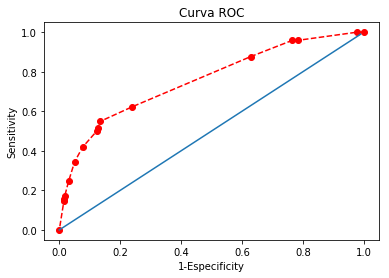

In [84]:
plt.plot(espec_1,sens,marker='o',linestyle='--',color='red')
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel('1-Especificity')
plt.ylabel('Sensitivity')
plt.title('Curva ROC');

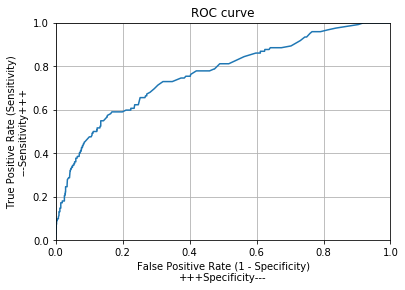

In [116]:
from sklearn import metrics 
especificity_1, sensitivity, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])
plt.plot(especificity, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)\n+++Specificity---')
plt.ylabel('True Positive Rate (Sensitivity)\n---Sensitivity+++')
plt.grid(True)

In [117]:
df = pd.DataFrame( {
                    '1_especificity':especificity_1,
                    'sensitivity':sensitivity,
                    'threshold':thresholds
})

In [118]:
df.head()

,1_especificity,sensitivity,threshold
0,0.000000,0.008197,0.943988
1,0.000000,0.032787,0.892717
2,0.000898,0.032787,0.870633
3,0.000898,0.057377,0.827915
4,0.001795,0.057377,0.805819


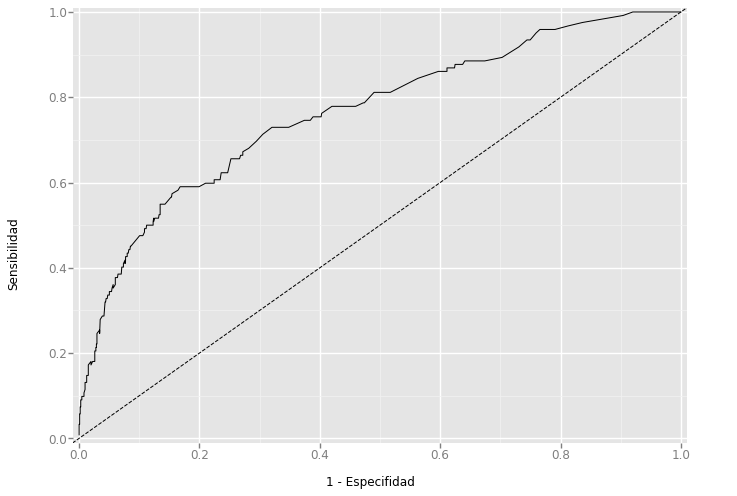

<ggplot: (8759313253510)>

In [119]:
from ggplot import *
ggplot(df,aes(x='1_especificity',y='sensitivity')) + geom_line() + geom_abline(linetype='dashed') + xlim(-0.01,1.01) + ylim(-0.01,1.01) + xlab('1 - Especifidad') + ylab('Sensibilidad')

In [107]:
from sklearn import metrics 
auc = metrics.roc_auc_score(y_test, y_pred_prob[:,1])
auc

0.764351620213674

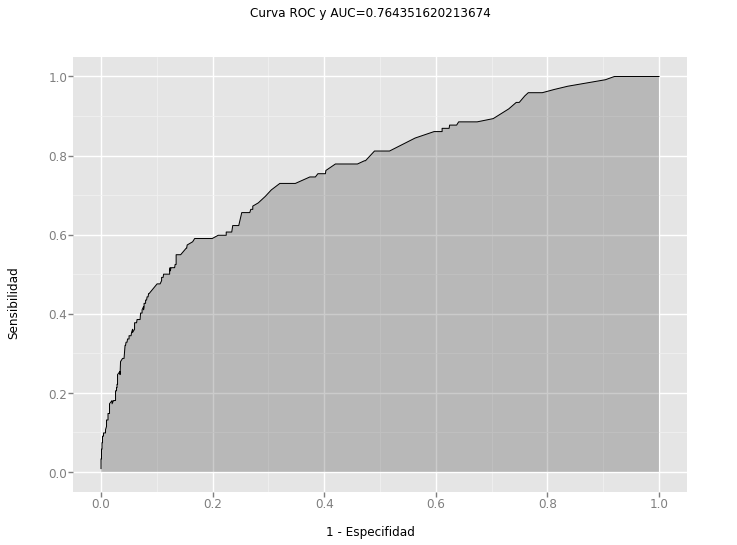

<ggplot: (-9223363277541061218)>

In [114]:
ggplot(df,aes(x='1_especificity',y='sensitivity')) + geom_area(alpha=0.25) + geom_line(aes(y='sensitivity'))+ggtitle('Curva ROC y AUC=%s'%(str(auc))) + xlab('1 - Especifidad') + ylab('Sensibilidad')